In [343]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [344]:
data = pd.read_csv("D:\Customer\Telco-Customer-Churn.csv")
data.shape

(7043, 21)

**EDA**

In [345]:
# understanding the data by importing 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [346]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [347]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [348]:
#unique values
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [349]:
#Null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [350]:
# Churn w.r.t gender
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [351]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [352]:
#Churn distribution percent wise
labels = data['Churn'].unique()
values = data['Churn'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(width=800, height=500,title_text="<b>Churn Distribution<b>")
fig.show()

In [353]:
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='Viridis',
    annotation_text=corr.round(2).values,
    showscale=True
)

fig.update_layout(width=800, height=500,title='Correlation Heatmap')
fig.show()


In [354]:

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [939, 930, 2549, 2625]
))

fig.update_layout(width=800, height=500, bargap=0.1,title_text="<b>Churn Distribution w.r.t. Gender</b>")

fig.show()

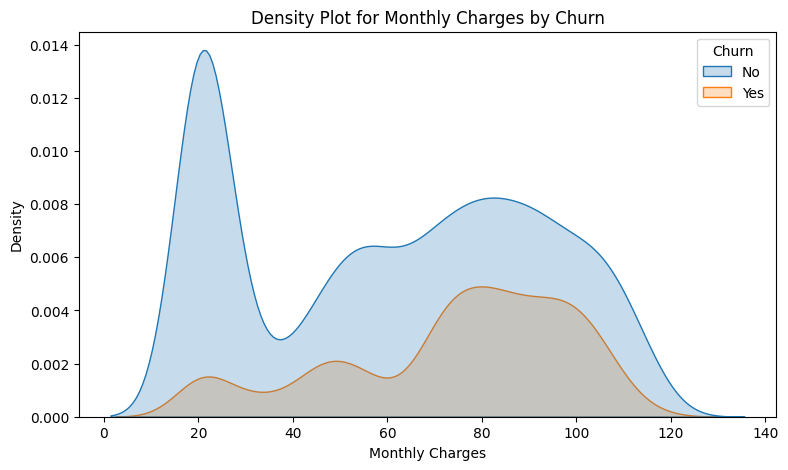

In [355]:
# Graph representing relation b/w churn and monthly charge
plt.figure(figsize=(9, 5))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Density Plot for Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

In [356]:
#churn distribution w.r.t partners
data.Churn[data.Churn == "Yes"].groupby(by = data.Partner).count()

Partner
No     1200
Yes     669
Name: Churn, dtype: int64

In [357]:
data.Churn[data.Churn == "No"].groupby(by = data.Partner).count()

Partner
No     2441
Yes    2733
Name: Churn, dtype: int64

In [358]:
#Graph of the same
color_map = {"Yes": '#504aff', "No": '#1e1c66'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

Customers with no partners are more likely to churn.

In [359]:
# churn distribution based on dependents
color_map = {"Yes": "#eb34e8", "No": "#661d65"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

Customers who are dependent are more likely to churn

In [360]:
#Customer contract distribution
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()


Customers with monthly contracts are more likely to churn.

In [361]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(width=800, height=500,title_text="<b>Payment Method Distribution</b>")
fig.show()

In [362]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

In [363]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**New Feature**

In [364]:
#Creating average charges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['AverageCharges'] = data['TotalCharges'] / data['tenure']

data = data.dropna()
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AverageCharges'],
      dtype='object')

In [365]:
data.AverageCharges

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AverageCharges, Length: 7032, dtype: float64

**Churn Prediction Model**

In [366]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# converting to numeric
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']
if all(col in data.columns for col in categorical_columns):
    data = pd.get_dummies(data, columns=categorical_columns)
else:
    raise KeyError(f"One or more of the required columns {categorical_columns} are missing.")


data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['AverageCharges'] = data['TotalCharges'] / data['tenure']
data = data.dropna(subset=['AverageCharges'])

# Dropping customer id
data = data.drop(columns=['customerID'])




In [367]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Using random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def print_metrics(y_test, y_pred, model_name):
    print(f'{model_name} Model:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred):.3f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.3f}')
    print('\n')

# Print evaluation metrics for both models
print_metrics(y_test, y_pred_lr, 'Logistic Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')

Logistic Regression Model:
Accuracy: 0.788
Precision: 0.623
Recall: 0.513
F1-Score: 0.563


Random Forest Model:
Accuracy: 0.781
Precision: 0.617
Recall: 0.465
F1-Score: 0.530


